In [66]:
import pandas as pd

data = pd.read_csv('/kaggle/input/social-network-ads/Social_Network_Ads.csv')
df = pd.DataFrame(data)
df.sample(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
40,15764419,Female,27,17000,0
135,15578006,Male,23,63000,0
123,15574305,Male,35,53000,0
362,15768072,Female,47,50000,1
217,15582066,Male,40,78000,0
335,15601550,Female,36,54000,0
160,15744279,Male,32,100000,1
8,15600575,Male,25,33000,0
71,15726358,Female,24,27000,0
247,15775590,Female,57,122000,1


In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

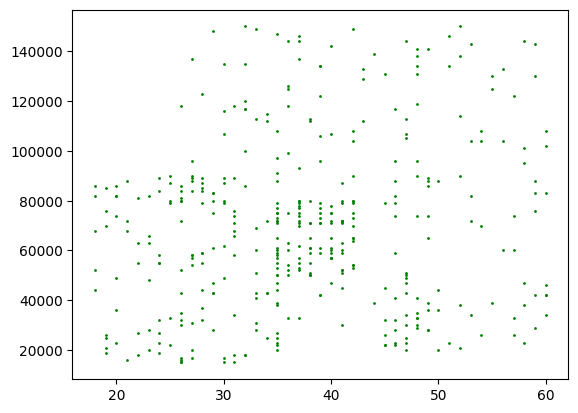

In [84]:
fig, ax = plt.subplots()
ax.scatter(df['Age'].values , df['EstimatedSalary'].values , c='green' , s=1)

In [69]:
df = df.drop(['Gender','User ID','Purchased'],axis =1)
df0 = df.copy()
df1 = df.copy()
df2 = df.copy()

In [70]:
df0.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


# Standardisation


In [71]:
df1['Age'] = (df1['Age'] - df1['Age'].mean()) / df1['Age'].std()
df1['EstimatedSalary'] = (df1['EstimatedSalary'] - df1['EstimatedSalary'].mean()) / df1['EstimatedSalary'].std()

df1

,Age,EstimatedSalary
0,-1.779569,-1.488183
1,-0.253270,-1.458854
2,-1.111813,-0.784307
3,-1.016419,-0.373714
4,-1.779569,0.183521
...,...,...
395,0.796060,-0.842964
396,1.273028,-1.370870
397,1.177635,-1.458854
398,-0.157877,-1.077589


In [87]:

print(df1['Age'].mean() , df1['Age'].std())
print(df1['EstimatedSalary'].mean() , df1['EstimatedSalary'].std())

-1.4210854715202004e-16 1.0


# Standard Scaler


In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(df0)
df0 = pd.DataFrame(scaled_data, columns=df0.columns)
df0

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [91]:
print(df0['Age'].mean() , df0['Age'].std())
print(df0['EstimatedSalary'].mean() , df0['EstimatedSalary'].std())


-7.105427357601002e-17 1.0012523486435176
-1.7763568394002505e-17 1.0012523486435179


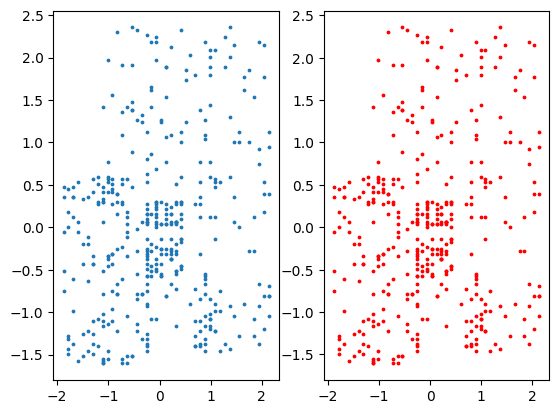

In [75]:
fig , ax = plt.subplots(1,2)
ax[0].scatter(df1['Age'].values, df1['EstimatedSalary'].values , s=3)
ax[1].scatter(df0['Age'].values, df0['EstimatedSalary'].values, c ='red' , s =3)

# Effect of Scaling


In [77]:
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

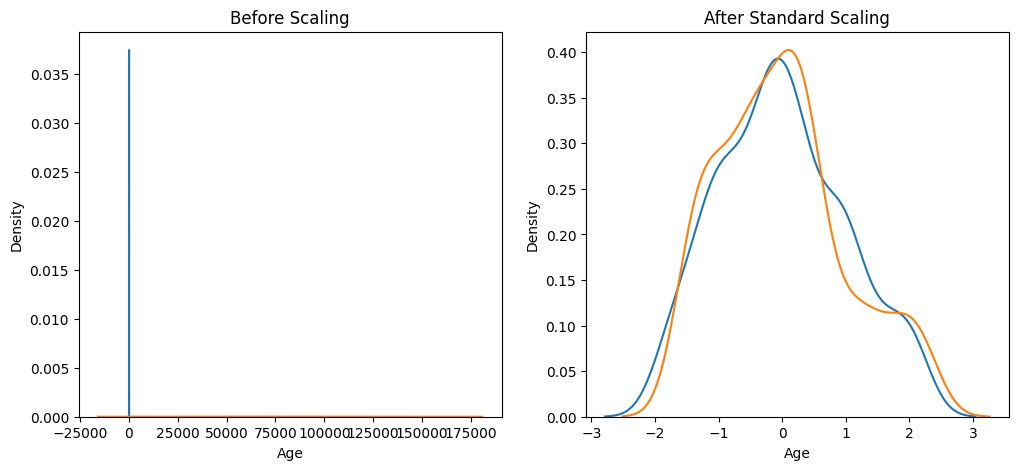

In [78]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,6))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(df['Age'], ax=ax1)
sns.kdeplot(df['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(df1['Age'], ax=ax2)
sns.kdeplot(df1['EstimatedSalary'], ax=ax2)
plt.show()